# Regression
### Author: _Calvin Chi_

Regression analysis is a statistical procedure of building a model to estimate the relationship between variables. In this tutorial, we will cover two types of regression models - linear regression and logistic regression. We will start with linear regression.

# Linear Regression
In linear regression, we assume that the true relationship between independent variables and the dependent variable follows the relationship:

$$y = X\beta + \epsilon$$

Where $y \in \mathbb{R}^{m x 1}$, $X \in \mathbb{R}^{m x n}$, $\beta \in \mathbb{R}^{n x 1}$, and $\epsilon  \stackrel{iid}{\sim} N(0, \sigma)$. Typically we do not know what the standard deviation $\sigma$ of the residual is, but it is also not required for estimating the coefficients $\beta$ relating the relationship between $X$ and $y$. 

This model has a few statistical properties: 

(1) $E(y) = E(X\beta) + E(\epsilon) = X\beta$    
(2) $y \sim N(X\beta, \sigma)$ because $Var(y) \sim Var(X\beta) + Var(\epsilon) = Var(\epsilon) = \sigma^{2}$. $Var(X\beta) = 0$ because $X\beta$ are fixed points, not random variables.     
(3) $\hat{\beta}$ is a consistent estimator according to $P( |\hat{\beta} - \beta| ) > \epsilon) \rightarrow 0$ as $n \rightarrow \infty$.

#### _Consistency Proof_
(1) $E(\hat{\beta}) = \beta $   
(2) In general, If $E[(X_{n} - X)^{2}] \rightarrow 0$, then $P(|X_{n} - X| > \epsilon) \rightarrow 0$ because $P(|X_{n} - X|^{2} > \epsilon^{2}) \le \frac{E[(X_{n} - X)^{2}]}{\epsilon^{2}} = 0$ according to Markov's inequality.   
(3) $Cov(\hat{B}) = (X^{T}X)^{-1}\sigma^{2} = Var(\hat{B})$ because:   
> If the loss function is defined as $l = \sum_{i=1}^{n}(y_{i} - \beta x_{i})^{2}$   
> Then $\hat{B} = (X^{T}X)^{-1}X^{T}y$   
> $Cov(\hat{B}) = (X^{T}X)^{-1}X^{T}Cov(\epsilon)X(X^{T}X)^{-1} = (X^{T}X)^{-1}(X^{T}X)Cov(\epsilon)(X^{T}X)^{-1} = \sigma^{2}(X^{T}X)^{-1}$    
> $Cov(\hat{B}) = Var(\hat{B})$ because $\sigma^{2}$ cross-diagonal terms are zero. $\sigma^{2}$'s cross-diagonal terms are zero because $\epsilon$ are independently and identically distributed.   

(4) If $Z = c + AY$, where only $Y$ is random, then $Cov(Z) = ACov(Y)A^{T}$

$E[(\hat{B} - B)^{2}] = E[(\hat{B} - E(\hat{B}))^{2}] = Var(\hat{B})$ by definition of variance.   
Since $X \in \mathbb{R}^{nx1}$, $X^{T}X$ is a scalar, and $\rightarrow \infty$ as $n \rightarrow \infty$, hence   
$Cov(\hat{B}) = Var(\hat{B}) = (X^{T}X)^{-1}\sigma^{2} \rightarrow 0$, and $E[(\hat{B} - B)^{2}] \rightarrow 0$ as $n \rightarrow \infty$, and thus $P( |\hat{\beta} - \beta| ) > \epsilon) \rightarrow 0$. 


## Optimization
An intuitive way of evaluating the fitness of our model is to quanitfy the difference between predicted value and actual value $y - \hat{y}$. A common way to do so is to sum the squared differences of all the predicted output, defined as 

$$L = \sum_{i=1}^{n}(y^{i} - \hat{y}^{i})^{2}$$

Where $y^{i}$ represents the actual value of sample $i$. Our goal is to find $\beta$ that minimizes loss, which is sometimes called the objective function. One way to minimize this loss is by finding $\beta$ such that the first derivative of the loss is equal to zero. Let us do that now in matrix notation:

$$L = (y - \hat{y})^{T}(y - \hat{y})$$
$$\frac{d(L)}{d\beta} = -2X^{T}(y - X\beta) = -X^{T}y + X^{T}X\beta = 0$$
$$\hat{\beta} = (X^{T}X)^{-1}X^{T}y$$

We can verify that the $\hat{\beta}$ that we have found is the $\hat{\beta}$ that minimizes $L$ by the second derivative test:

$$\frac{d^{2}(L)}{d\beta^{2}} = X^{T}X $$

Which ensures that the diagonal terms, and thus all the appropriate second derivative terms, are positive. 

## Implementation

In our implementation below we will use linear regression to predict median home value in a given Census area. There are a total of 8 features for each data point. First, let us load up this dataset and examine the design matrix $X$.

In [5]:
from scipy import io
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

data = io.loadmat('datasets/housing_data.mat')
xtrain = data['Xtrain']
ytrain = data['Ytrain']
xvalidate = data['Xvalidate']
yvalidate = data['Yvalidate']
print(xtrain.shape)
print(ytrain.shape)

(19440, 8)
(19440, 1)


The design matrix $X$ is a $19440 x 8$ matrix. We now add the constant terms of one so that the model estimates $\beta_{0}$ values.

In [6]:
m1 = xtrain.shape[0]
m2 = xvalidate.shape[0]
xtrain = np.hstack((np.ones((m1, 1)), xtrain))
xvalidate = np.hstack((np.ones((m2, 1)), xvalidate))
print(xtrain.shape)
print(xvalidate.shape)

(19440, 9)
(1200, 9)


We can now find our $\beta$ values using our least squares solution: 

$$\hat{\beta} = (X^{T}X)^{-1}X^{T}y$$



In [12]:
coef = np.dot(np.dot(inv(np.dot(np.transpose(xtrain), xtrain)), 
        np.transpose(xtrain)), ytrain)
print(coef)

[[ -3.56686439e+06]
 [  4.05879986e+04]
 [  1.19561189e+03]
 [ -8.50145688e+00]
 [  1.18352188e+02]
 [ -3.77900280e+01]
 [  4.30562637e+01]
 [ -4.21794075e+04]
 [ -4.24573474e+04]]


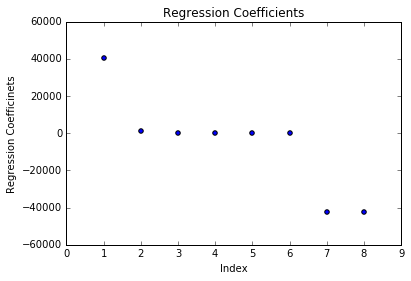

In [50]:
%matplotlib inline
xplot = np.array(range(1, 9))
yplot = coef[1:len(coef)]
plt.scatter(xplot, yplot)
plt.title("Regression Coefficients")
plt.xlabel('Index')
plt.ylabel('Regression Coefficinets')
plt.show()

We now predict on our validation set via the equation:

$$y = X_{validation}\hat{\beta}$$

In [30]:
ypredict = np.dot(xvalidate, coef)

And calculate the residual sum of squares error:

In [42]:
error = ypredict - yvalidate
RSS = np.sum(error**2)
print("The residual sum of squares is", RSS)

The residual sum of squares is 5.79495379765e+12


We can now evaluate how well our assumption that the errors are independently and identically distributed holds: 

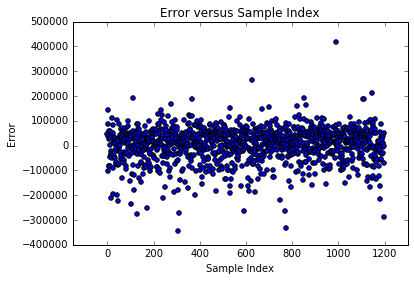

In [48]:
plt.scatter(range(m2), (ypredict - yvalidate))
plt.xlim(-150, 1300)
plt.title("Error versus Sample Index")
plt.xlabel('Sample Index')
plt.ylabel('Error')
plt.show()

And indeed, the errors appear to be identically and independently distributed across samples. We can check whether the errors do distribute according to a normal distribution with mean zero and unknown standard deviation:

$$\epsilon \stackrel{iid}{\sim} N(0, \sigma)$$


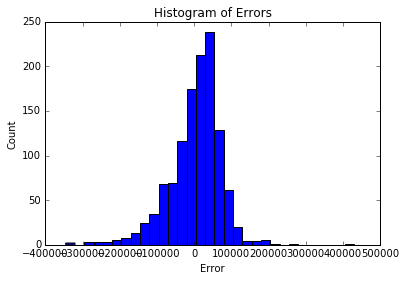

In [51]:
plt.hist(error, bins=np.arange(min(error), max(error) + 25000, 25000))
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Histogram of Errors')
plt.show()

The errors do appear normally distributed, but with a slight left tail. 

## Estimating Standard Deviation
Once we have the errors, it is possible to construct an unbiased estimator for the standard deviation $\sigma$ of the residuals. The formula for the unbiased estimator is as follows:

$$\hat{\sigma}^{2} = \frac{1}{n-p}\sum_{i=1}^{n}e_{i}^{2}$$

Where $e$ is the error, $p$ is the number of feastures, and $n$ is the number of samples. 

#### _Proof_
(1) $H = X(X^{T}X)^{-1}X^{T}$  
(2) $H^{2} = H$   
(3) $\tilde{H} = I - H$    
(4) $e = y - \hat{y} = y - Hy = y(I - H) = (I - H)(X\beta + \epsilon) =
X\beta + \epsilon - X(X^{T}X)^{-1}(X^{T}X)\beta - H\epsilon =\\ 
(I - H)\epsilon = \tilde{H}\epsilon\\$    
(5) tr(AB) = tr(BA)   

$\sum_{i=1}^{n}e_{i}^{2} = e^{T}e \stackrel{by\:(4)}{=} \epsilon^{T}\tilde{H}^{T}\tilde{H}\epsilon \stackrel{by\:(3)} = \epsilon^{T}(I - H)(I - H)\epsilon = \epsilon^{T}(I^{2} - 2HI + H^{2})\epsilon\\ \stackrel{by\:(2)}{=} \epsilon^{T}(I^{2} - 2H + H)\epsilon = \epsilon^{T}(I - H)\epsilon \stackrel{by\:(3)}{=} \epsilon^{T}\tilde{H}\epsilon$   

$$E(\sum_{i=1}^{n}e_{i}^{2}) = E(\epsilon^{T}\tilde{H}\epsilon|X) =$$ $$E(\sum_{i=1}^{n}\sum_{j=1}^{n}\epsilon_{i}\tilde{H}_{i, j}\epsilon_{j}|X) =$$ $$\sum_{i=1}^{n}\sum_{j=1}^{n}\tilde{H}_{i, j} E(\epsilon_{i}\epsilon_{j}|X) = $$
$$\sigma^{2} tr(\tilde{H}) = \sigma^{2} tr(I - H) = \sigma^{2} (tr(I) - tr(H)) =$$
$$\sigma^{2} (n - tr(X(X^{T}X)^{-1}X^{T})) = \sigma^{2} (n - tr((X^{T}X)^{-1}(X^{T}X))) =$$ $$\sigma^{2} (n - p)$$

Hence, $E(\frac{1}{n-p}\sum_{i=1}^{n}e_{i}^{2}) = \sigma^{2}$

Let's estimate what $\sigma$ is in our data:

In [52]:
variance = 1/(m2 - 9)*sum(error**2)
print(variance)

[  4.86562032e+09]


# Logistic Regression

Logistic regression is best used in classification settings where the outcome $y$ is binary $\in \{0, 1\}$. Probabilistically, we assume that the outcome is $1$ with probability $p$ and $0$ with probability $q = 1 - p$. Thus, the outcome is a Bernoulli random variable with parameter $p$. The goal of logistic regression is to find $p$ via a function of the data $X$. A good function is one that is bounded between $[0, 1]$, and one typically chosen in logistic regression is:

$$ f(z) = \frac{1}{e^{-z} + 1} $$

Graphically this function appears as:

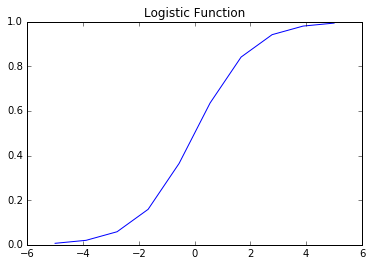

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
x = np.linspace(-5, 5, 10, endpoint=True)

def logistic(x):
    return 1 / (np.exp(-x) + 1)

y = logistic(x)
plt.plot(x, y)
plt.title("Logistic Function")
plt.show()

Which we can verify that the function indeed is bounded at $[0, 1]$. In logistic regression, the model we are trying to train using the data is $\beta$ defined in:

$$P(y = 1 | X) = \frac{1}{e^{-X\beta} + 1}$$

Where $X \in \mathbb{R}^{m x n}$. Thus, once $\beta$ is trained and the logistic function constructed, the output of this function has a probabilisitic interpretation. How one classifies a data point will then depend on the threshold. For example, one can classify any sample that outputs a probability greater than 50% as one class and any sample with probability below 50% as another class. Typically, one evaluates probabilistic models by using the area under the ROC curve. The closer the area is to 1, the better the model.

## Optimization
One way to find $\beta$ is by minimzing a function that quantifies the error of the model. In this tutorial, we are going to use cross entropy as our loss function: 

$$ L = \sum_{i = 1}^{n}log(1 + e^{-z^{(i)}}) $$

Where $n$ is the number of training samples. To understand why the $\beta$ that minimizes cross entropy is the $\beta$ closest to true $\beta$, we must understand cross entropy.

### Cross Entropy
In information theory, cross entropy is used to quantify how similar to two probability distributions $Q$ and $P$ are. Cross entropy is defined as: 

$$ R = \sum_{i}p_{i}log_{2}(\frac{1}{q_{i}}) = -\sum_{i}p_{i}log_{2}(q_{i})$$

$R$ is minimized when $Q$ and $P$ is the same. To see how this is so, assume without loss of generality that $Q$ and $P$ are 2-valued vectors. Thus, the objective is to minimize:

$$R = -p_{1}ln q_{1} - p_{2}ln q_{2} $$

With respect to $q_{1}$ and $q_{2}$ under the constraint that:

$$C = q_{1} + q_{2} = 1$$

To solve this we utilize the method of lagrange multipliers:

$$\frac{\partial R}{\partial q_{1}} = -\frac{p_{1}}{q_{1}}\\$$
$$\frac{\partial R}{\partial q_{2}} = -\frac{p_{2}}{q_{2}}\\$$
$$-\frac{p_{1}}{q_{1}} = \lambda \frac{\partial C}{\partial q_{1}} = \lambda\\$$
$$-\frac{p_{2}}{q_{2}} = \lambda \frac{\partial C}{\partial q_{2}} = \lambda\\$$
$$\frac{p_{1}}{q_{1}} = \frac{p_{2}}{q_{2}}\\$$
$$p_{1}q_{2} = p_{2}q_{1}\\$$
$$q_{2} = \frac{p_{2}q_{1}}{p_{1}}\\$$

Given the constraint that $q_{1} = 1 - q_{2}$:

$$q_{2} = \frac{p_{2}}{p_{1}} - \frac{p_{2}q_{2}}{p_{1}}\\$$
$$p_{1}q_{2} = p_{2} - p_{2}q_{2}\\$$
$$q_{2} = \frac{p_{2}}{p_{1} + p_{2}} = p_{2}$$
$$q_{1} = 1 - q_{2} = 1 - p_{2} = p_{1}$$

We can ensure that $R$ is minimized when $P = Q$ through numerical examples.

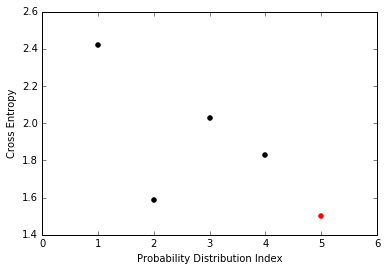

In [12]:
q1 = np.array([0.01, 0.49, 0.5])
q2 = np.array([1/3, 1/3, 1/3])
q3 = np.array([0.05, 0.1, 0.85])
q4 = np.array([0.58, 0.12, 0.3])
p = np.array([0.25, 0.25, 0.5])
qs = [q1, q2, q3, q4]

def crossEntropy(prob):
    p = np.array([0.25, 0.25, 0.5])
    R = -sum(p*np.log2(prob))
    return R

rs = []
for q in qs:
    rs.append(crossEntropy(q))

plt.scatter(np.linspace(1, 4, 4, endpoint=True), rs, color="black")
plt.scatter(5, crossEntropy(p), color="red")
plt.xlabel("Probability Distribution Index")
plt.ylabel("Cross Entropy")
plt.show()

The red dot in the graph above corresonds to the cross entropy when $P = Q$. In other words, the cross entropy was calculated: 

$$ R = -\sum_{i}p_{i}log_{2}p_{i} $$

We can visually see that this cross entropy is the lowest value compared to other cross entropies calculated when $P \neq Q$. Thus, cross entropy can be interpreted as a measure of how close $P$ is to $Q$ - the closer they are, the smaller the cross entropy value. 

### Minimizing Cross Entropy
Now returning to the topic of logistic regression, our probablility model is:

$$ q = \frac{1}{1 + e^{-z}} $$

The true $P$ is just our labels $\in [0, 1]$, so our cross entropy expression reduces to:

$$ R = -log_{2}(1 + e^{-z})^{-1} = log_{2}(1 + e^{-z})$$

Where $z^{(i)} = y^{(i)}x^{(i)}\beta$ and is sometimes referred to as the functional margin. $(i)$ denotes the $i^{th}$ sample, and $y \in \{-1, +1\}$. We now call this logistic loss, and this is the function that we want to minimize. Let us plot this loss function that we have chosen:

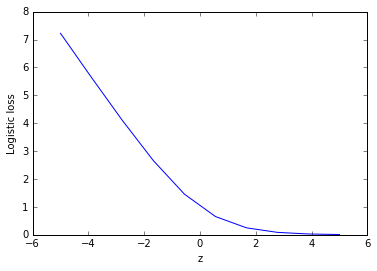

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

z = np.linspace(-5, 5, 10)

def crossEntropy(z):
    return np.log2(1 + np.exp(-z))

y = crossEntropy(z)
plt.plot(z, y)
plt.xlabel("z")
plt.ylabel("Logistic loss")
plt.show()

We see that when $z$ is positive, which occurs when $y^{(i)}$ and $x^{(i)}\beta$ have the same sign, the logistic loss is small. However, when $z$ is negative, which occurs when $y^{(i)}$ and $x^{(i)}\beta$ have different signs, then logistic loss is great. Hence, the more the predicted class and actual class disagree, the greater the penalty. 

One should note that the logistic loss is also called the negative log likelihood from a probabilisitic standpoint. Minimizing the negative log likelihood is equivalent to maximizing the log likelihood, so what we are doing is equivalent to finding $\beta$ that maximizes the likelihood of the data being seen.

In this tutorial, we are going minimize our logistic loss using gradient descent. We will be using a modified logistic loss with natural log instead of log base 2 to make the derivation easier, but the transformation will not alter the end result. 

$$ R = ln(1 + e^{-y^{(1)}x^{(1)}\beta}) + ... + ln(1 + e^{-y^{(m)}x^{(m)}\beta})$$

Let us derive our update equation by first finding the gradient. Note that $X \in \mathbb{R}^{m x n}$, where $m$ is number of samples and $n$ is number of features.

$$ X = 
\begin{bmatrix}
x_{10} & \dots & x_{1n}\\
\vdots & \ddots & \vdots \\
x_{m0} & \dots & x_{mn} \\
\end{bmatrix}$$

$$ \frac{\partial R}{\partial \beta_{0}} = -\Big[\frac{x_{10}y^{(1)}e^{-y^{(1)}x^{(1)}\beta}}{1 + e^{-y^{(1)}x^{(1)}\beta}} + ... + \frac{x_{m0}y^{(m)}e^{-y^{(m)}x^{(m)}\beta}}{1 + e^{-y^{(m)}x^{(m)}\beta}}\Big]$$
$$\vdots$$
$$ \frac{\partial R}{\partial \beta_{n}} = -\Big[\frac{x_{1n}y^{(1)}e^{-y^{(1)}x^{(1)}\beta}}{1 + e^{-y^{(1)}x^{(1)}\beta}} + ... + \frac{x_{mn}y^{(m)}e^{-y^{(m)}x^{(m)}\beta}}{1 + e^{-y^{(m)}x^{(m)}\beta}}\Big]$$

Given that:

$$\frac{e^{-y^{(i)}x^{(i)}\beta}}{1 + e^{-y^{(i)}x^{(i)}\beta}} = \frac{1}{e^{y^{(i)}x^{(i)}\beta} + 1}$$

and that $diag(y)$ means to turn a vector into a square matrix where each element in the vector becomes a diagonal element in the matrix, with zero all non-diagonal elements, we can write out the gradient in matrix form:

$$\frac{\partial \textbf{R}}{\partial \beta} = -(diag(y)X)^{T} \frac{1}{e^{diag(y)X\beta} + 1}$$

Now with the gradient $G \in \mathbb{R}^{n x 1}$, we can write our update equation:

$$ \beta := \beta - \alpha G$$

Where $\alpha$ is our learning rate or step size. We are now ready to implement our logistic regression algorithm!

## Implementation

We are going to use our logistic regression implementation to predict whether an email is spam or not spam (ham). Our dataset consists of $3450$ emails, each with $57$ features. Most features are proportions of words that match a certain word. Some features however, are created, such as the sum of lengths of uninterrupted sequences of capital letters. Let us load our dataset and randomly partition $90\%$ of it as the validation dataset.

In [9]:
from scipy import io
import matplotlib.pyplot as plt
import numpy as np

data = io.loadmat('datasets/spam.mat')
Xtrain = data['Xtrain']
Ytrain = data['Ytrain']
m = Xtrain.shape[0]
idx = np.random.permutation(m)
Xtrain = data['Xtrain'][idx, :]
Ytrain = data['Ytrain'][idx, :]
Xvali = Xtrain[round(0.9*m):m, :]
Yvali = Ytrain[round(0.9*m):m, :]
Xtrain = Xtrain[:round(0.9*m), :]
Ytrain = Ytrain[:round(0.9*m), :]

Often times, it is a good idea to preprocess our data in order to get better performance. A common preprocessing step is to standardize each feature so that it has mean $0$ and unit variance.

In [10]:
def standardize(a):
    return (a - np.mean(a)) / np.std(a)

XtrainP = np.apply_along_axis(standardize, 0, Xtrain)
XvaliP = np.apply_along_axis(standardize, 0, Xvali)

Now it is time to write our gradient descent methods. There are two types of gradient descent methods - batch gradient descent and stochastic gradient descent. In batch gradient descent, the gradient is calculated using the whole dataset at each update step, and is computationally intensive. In stochastic gradient descent, the gradient is calculated using a single sample, and is computationally less intensive. While stochastic gradient descent is not guaranteed to converge to the minimum cost function, it is faster than batch gradient descent and may be a good strategy to use with large datasets. 

In [130]:
class logisticRegression():
    def __init__(self, gradient="batch", rate=0.001, stop=2):
        if gradient != "batch" and gradient != "stochastic":
            raise ValueError("Enter either 'batch' or 'stochastic' for gradient")
        self.gradient = gradient
        self.rate = rate
        self.stop = stop
    def train(self, Xtrain, Ytrain):
        def batch(self, Xtrain, Ytrain):
            self.errors = []
            i = 0
            self.iterations = [i]
            errBefore = float('inf')
            self.w = np.zeros((Xtrain.shape[1], 1))
            q = np.dot(np.diag(Ytrain[:, 0]), Xtrain)
            errAfter = loss(q, self.w)
            self.errors.append(errAfter)
            while abs(errBefore - errAfter) > 2:
                errBefore = errAfter
                g = gradient(Xtrain, Ytrain, self.w, q)
                if callable(self.rate):
                    step = self.rate(i)
                else:
                    step = self.rate
                self.w = self.w - step * g 
                errAfter = loss(q, self.w)
                self.errors.append(errAfter)
                i += 1
                self.iterations.append(i)
        def stochastic(self, Xtrain, Ytrain, repeat=3):
            k = 0
            self.errors = []
            self.iterations = [k]
            self.w = np.zeros((Xtrain.shape[1], 1))
            errBefore = float('inf')
            q = np.dot(np.diag(Ytrain[:, 0]), Xtrain)
            errAfter = loss(q, self.w)
            self.errors.append(errAfter)
            for r in range(repeat):
                for i in range(len(Xtrain)):
                    errBefore = errAfter
                    x = Xtrain[[i], :]
                    y = Ytrain[[i]]
                    g = gradient(x, y, self.w)
                    if callable(self.rate):
                        step = self.rate(i)
                    else:
                        step = self.rate
                    self.w = self.w - step * g
                    errAfter = loss(q, self.w)
                    self.errors.append(errAfter)
                    k += 1
                    self.iterations.append(k)
        def gradient(x, y, w, q=None):
            if q is None:
                q = np.dot(y, x)
            g = np.dot(-np.transpose(q), (1 / (np.exp(np.dot(q, w)) + 1)))
            return g 
        def loss(q, w):
            return np.sum(np.log(1 + np.exp(-np.dot(q, w))))
        if self.gradient == "batch":
            batch(self, Xtrain, Ytrain)
        else:
            stochastic(self, Xtrain, Ytrain)
    def plot(self):
        plt.plot(self.iterations, self.errors)
        plt.xlabel("Iterations")
        plt.ylabel("Cross Entropy")
        plt.title("Cross Entropy vs Iterations, gradient = %s" % (self.gradient))
        plt.show()   
    def predict(self, x):
        z = np.dot(x, self.w)
        p = 1 / (np.exp(-z) + 1)
        return p

Let us first perform batch gradient descent with a learning rate of $\alpha = 0.001$ and monitor the cross entropy with the number of iterations.

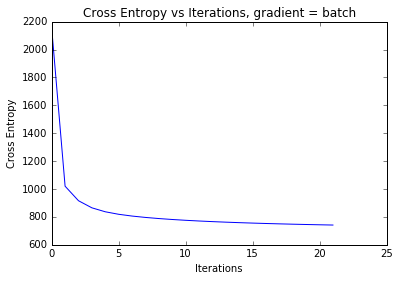

In [113]:
logistic1 = logisticRegression(gradient = "batch")
logistic1.train(XtrainP, Ytrain)
logistic1.plot()

As expected, the cross entropy decreases with the number of iterations. Let us now evaluate the performance of the $\beta$ we trained. We can visually inspect the predictions to see if samples that are marked as spam $1$ do indeed have a probability close to $1$, while those marked as ham $-1$ have a probability close to $0$.

In [124]:
predictions = logistic1.predict(XvaliP)
print(np.round(predictions[1:8], 2))
print(Yvali[1:8])

[[ 0.  ]
 [ 0.13]
 [ 0.  ]
 [ 1.  ]
 [ 0.01]
 [ 0.  ]
 [ 0.76]]
[[-1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [ 1]]


Indeed, we can see that samples that are spam are predicted to be spam with high probability. Formally, let us evaluate our model by calculating the area under the ROC curve. 

In [125]:
from sklearn import metrics
fpr , tpr, thresholds = metrics.roc_curve(Yvali, predictions, pos_label=1)
auc = metrics.auc(fpr, tpr)
print(auc)

0.977175663376


The area under the ROC curve is close to $1$, which means our model performed well and is robust. Now let us run logistic regression again but with a learning rate defined by:

$$rate(i) = \frac{3}{1000 + 5i}$$

Where $i$ is the iteration. In some situations it may be preferable to decrease the learning rate with iterations, because models that are closer to the minimum loss function only require a smaller step size. In contrast, if the step size is kept constant, the model may constantly overshoot the model of minimum loss because the step size is too large at the end. From the model we trained above with $\alpha = 0.001$, we don't seem to have this problem, but let us train another model with decreasing step size anyways to see how the cross entropy behaves with iterations.

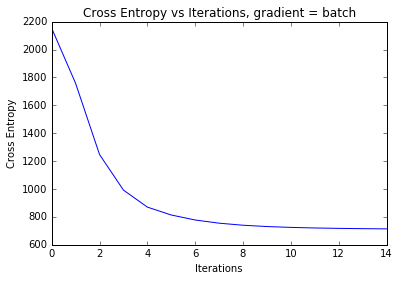

In [126]:
%matplotlib inline
def f(i):
    return (3 / (1000 + 5*i))
logistic2 = logisticRegression(gradient="batch", rate=f)
logistic2.train(XtrainP, Ytrain)
logistic2.plot()

We see that performance is not affected, and the final cross entropy when the convergence criteria that the difference in cross entropy between iterations is less than or equal to 2 may actually be less than that with constant learning rate. Although our data is relatively small and performing batch gradient descent did not take a lot of time, let us perform stochastic gradient descent to see how the cross entropy behaves with the number of iterations. 

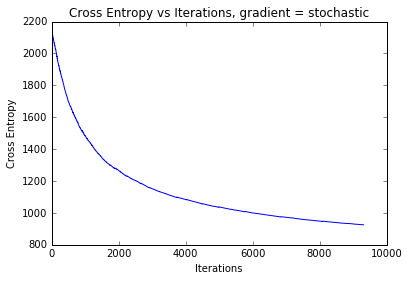

In [131]:
logistic3 = logisticRegression(gradient = "stochastic")
logistic3.train(XtrainP, Ytrain)
logistic3.plot()

One can see that with stochastic gradient descent, it may not be possible to reach the model with minimum loss because we are not leveraging all of our data to calculate the gradient. Nevertheless, stochastic gradient descent may be useful when our data is big and it is sufficient to have a model that roughly approximates that of minimum loss.

## Kernel Logistic Regression

Now we shall implement kernel logistic regression. The purpose of applying a kernel is to project your data into higher dimensional space to improve performance. As a motivating example, consider trying to fit a linear decision boundary between class 1 and class 2 in the below plot:

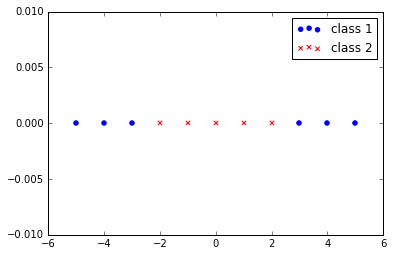

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x1 = [-5, -4, -3, 3, 4, 5]
y1 = np.linspace(0, 0, 6, endpoint=True)
x2 = [-2, -1, 0, 1, 2]
y2 = np.linspace(0, 0, 5, endpoint=True)
plt.scatter(x1, y1, marker="o", color="blue", label = "class 1")
plt.scatter(x2, y2, marker="x", color="red", label = "class 2")
plt.legend(loc="upper right")
plt.show()

It cannot be done without having a high training error. Instead, let us tranform our data using the following mapping:

$$f: (x, y) \rightarrow (x, x^{2})$$

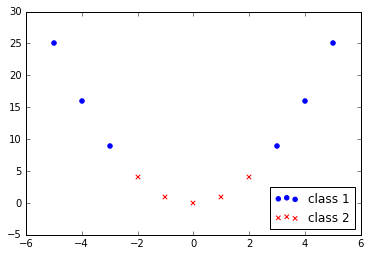

In [15]:
x1 = np.array([-5, -4, -3, 3, 4, 5])
y1 = np.square(x1)
x2 = np.array([-2, -1, 0, 1, 2])
y2 = np.square(x2)
plt.scatter(x1, y1, marker="o", color="blue", label = "class 1")
plt.scatter(x2, y2, marker="x", color="red", label = "class 2")
plt.legend(loc="lower right")
plt.show()

Now our data is linearly separable! The purpose of a kernel is to transform the data into linearly separable dimensions. The kernel we are going to use in this tutorial will be the radial basis function, which projects the features into infinite dimensional space. 

$$K(x^{(i)}, x) = e^{-\frac{||x^{(i)} - x ||^{2}}{2\sigma^{2}}}$$

Where $x^{(i)} \in \mathbb{R}^{n x 1}$ is a vector representing training sample $i$ in the dataset with $n$ features and $x \in \mathbb{R}^{n x 1}$ could be a vector representing a test/prediction sample. 

A kernel function $K$ can also be interpreted as a similarity measure. For example, vectors that are similar will produce a large $K(x^{(i)}, x)$, while those that are dissimilar will produce a small $K(x^{(i)}, x)$. In regular logistic regression, our functional margin is:

$$z^{(i)} = y^{(i)}f(x^{(i)}) = y^{(i)}x^{(i)}\beta$$

With kernel logistic regression with a quadratic kernel, the $f(x^{(i)})$ is now replaced by:

$$f(x^{(i)}) = \sum_{j=1}^{m}\alpha_{i}K(x^{(i)}, x^{(j)})$$

Where $m$ is the number of training samples and $\alpha$ is the new weight we will be training. Notice that $\alpha \in \mathbb{R}^{m x 1}$ instead of $\beta \in \mathbb{R}^{n x 1}$ in regular logistic regression. Returning to the concept of viewing the kernel as a similarity measure, we can observe that what the kernel is doing is boosting the weight $\alpha_{j}$ if $x^{(i)}$ and $x^{(j)}$ are similar.

Let us now derive the stochastic gradient descent update equation for $\alpha_{i}$ using the same logistic loss for one sample $j$:

$$ L^{(j)} = ln(1 + e^{-y^{(j)}\sum_{i = 1}^{n}\alpha_{j}K(x^{(i)}, x^{(j)})})$$

With $z^{(j)} = y^{(j)}\sum_{i = 1}^{n}\alpha_{j}K(x^{(i)}, x^{(j)})$

$$\frac{\partial L}{\partial \alpha_{i}} = \frac{e^{-z^{(i)}}}{1 + e^{-z^{(i)}}} -y^{(i)}K(x^{(i)}, x^{(i)}) = -\frac{1}{1 + e^{z{(i)}}}y^{(i)}(x^{(i)T}x^{(i)} + 1)^{2}$$


We can further improve our regression by incorporating ridge regression. The purpose of ridge regression is to prevent overfitting the model to the training data. We do so by incrementally decreasing the size of the weights $\alpha$ by a factor $\gamma$ during stochastic gradient descent. Given the learning rate $\eta$ our update equation is thus:

$$\alpha_{i} := \alpha_{i} - \gamma \alpha_{i} - \eta \frac{\partial L}{\partial \alpha_{i}}$$ 
$$\alpha_{h} := \alpha_{h} - \gamma \alpha_{h} \text{ for } h \ne i$$

We will be implementing kernel logistic ridge regression using the same email dataset as before. As always, let us load up the dataset and preprocess it via standardization.

In [1]:
from scipy import io
import matplotlib.pyplot as plt
import numpy as np

data = io.loadmat('datasets/spam.mat')
Xtrain = data['Xtrain']
Ytrain = data['Ytrain']
m = Xtrain.shape[0]
idx = np.random.permutation(m)
Xtrain = data['Xtrain'][idx, :]
Ytrain = data['Ytrain'][idx, :]
Xvali = Xtrain[round(0.9*m):m, :]
Yvali = Ytrain[round(0.9*m):m, :]
Xtrain = Xtrain[:round(0.9*m), :]
Ytrain = Ytrain[:round(0.9*m), :]

def standardize(a):
    return (a - np.mean(a)) / np.std(a)

XtrainP = np.apply_along_axis(standardize, 0, Xtrain)
XvaliP = np.apply_along_axis(standardize, 0, Xvali)

And now implement kernel logistic ridge regression (KLRR):

In [68]:
import sys

class KLRR():
    def __init__(self, rate=2.5, iterations=2, kernel="quadratic", gamma=1e-5, sigma=1):
        self.rate = rate
        self.iterations = iterations
        self.kernel = kernel
        self.gamma = gamma
        self.sigma = sigma
    def train(self, Xtrain, Ytrain, Xvalidate=None, Yvalidate=None):
        def kernel(self, xData, xsample):
            diff = np.sum(np.square(xData - xsample))
            return np.exp(-diff / (2*(self.sigma)**2))
        def clamp(x):
            if x <= 0:
                x = max(x, -10000)
            else:
                x = min(x, 10000)
            return x
        def gradient(y, x, Xtrain, w):
            kernels = list(map(lambda u: kernel(self, u, x), Xtrain))
            kernels = np.array(kernels).reshape(1, len(kernels))
            z = y*np.dot(kernels, w)
            z = clamp(z)
            S = 1 / (1 + np.exp(z))
            gradient = -S*y
            return gradient
        counter = 0
        self.Xtrain = Xtrain
        self.trainIterations = []
        self.trainErrors = []
        self.validateErrors = []
        self.validateIterations = []
        self.w = np.array([1e-10]*Xtrain.shape[0])
        kernelMatrix = np.empty([Xtrain.shape[0], Xtrain.shape[0]])
        for i in range(len(Xtrain)):
            rowKernel = []
            for j in range(len(Xtrain)):
                k = kernel(self, Xtrain[i], Xtrain[j])
                rowKernel.append(k)
            kernelMatrix[i] = rowKernel
        z0 = np.dot(np.diag(Ytrain[:, 0]), kernelMatrix)
        if Xvalidate is not None and Yvalidate is not None:
            kernelMatrix2 = np.empty([Xvalidate.shape[0], Xtrain.shape[0]])
            for i in range(len(Xvalidate)):
                row = []
                for j in range(len(Xtrain)):
                    k = kernel(self, Xtrain[j], Xvalidate[i])
                    row.append(k)
                kernelMatrix2[i] = np.array(row)        
        for r in range(self.iterations):
            for i in range(len(Xtrain)):
                y = Ytrain[[i]]
                x = Xtrain[[i], :]
                g = gradient(y, Xtrain[i], Xtrain, self.w)
                self.w[i] = self.w[i] - self.gamma * self.w[i] - self.rate * g
                self.w[:i] = self.w[:i] - self.gamma * self.w[i]
                self.w[i+1:len(self.w)] = self.w[i+1:len(self.w)]
                - self.gamma*self.w[i+1:len(self.w)]
                z = np.dot(z0, self.w)
                z = np.array(list(map(clamp, z)))
                error = np.sum(np.log(1 + np.exp(-z)))
                self.trainErrors.append(error)
                counter += 1
                self.trainIterations.append(counter)
                if Xvalidate is not None and Yvalidate is not None and counter % 100 == 0:
                    z = np.dot(np.diag(Yvalidate[:, 0]), np.dot(kernelMatrix2, self.w))
                    self.validateErrors.append(np.sum(np.log(1 + np.exp(-z))))
                    self.validateIterations.append(counter)
    def plot(self):
        if len(self.validateIterations) == 0:
            plt.plot(self.trainIterations, self.trainErrors)
            plt.xlabel("Iterations")
            plt.ylabel("Cross Entropy")
            plt.title("Cross Entropy vs Iterations")
            plt.show()  
        else: 
            fig = plt.figure()
            ax = fig.add_subplot(121)
            ax.plot(self.trainIterations, self.trainErrors, color="blue", 
                    label="Training")
            plt.title("Cross Entropy vs Iterations")
            plt.legend(loc="upper right")
            ax = fig.add_subplot(122)
            ax.plot(self.validateIterations, self.validateErrors, color="red",
                    label="Validate")
            plt.title("Cross Entropy vs Iterations")
            plt.legend(loc="upper right")
            plt.show()
    def predict(self, x):
        predictions = []
        for sample in x:
            diff = np.sum(np.square(self.Xtrain - sample), axis=1)
            kernel = np.exp(-diff / (2*(self.sigma)**2))
            f = np.dot(kernel, self.w)
            predictions.append(1 / (np.exp(-f) + 1))
        return predictions

Now let us train and plot the training and validation cross entropy with the number of iterations.

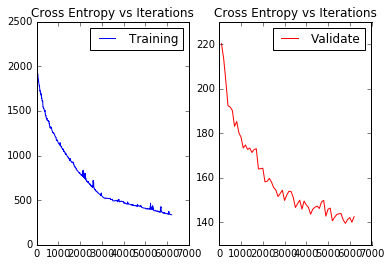

In [69]:
%matplotlib inline
klrr = KLRR(iterations=2, sigma=1.5)
klrr.train(XtrainP, Ytrain, XvaliP, Yvali)
klrr.plot()

We see that as training error decreases, validation error does not increase, indicating that we are not over-fitting. Again let us predict on our validation dataset and evaluate how the model performed:

In [72]:
predictions = klrr.predict(XvaliP)
print(np.round(predictions[100:115], 2))
print(np.transpose(np.array(Yvali[100:115])))

[ 0.    0.92  0.39  0.29  0.52  0.5   0.01  0.8   0.76  0.5   0.34  0.5
  0.02  0.5   0.86]
[[-1  1 -1 -1  1 -1 -1  1  1 -1 -1  1 -1  1  1]]


As expected, samples that are marked 1 (spam) are predicted to be spam with higher probability. Those marked -1 (ham) are predicted to be spam with lower probability. Let us formally evaluate the model with AUC. 

In [73]:
from sklearn import metrics
fpr , tpr, thresholds = metrics.roc_curve(Yvali, predictions, pos_label=1)
auc = metrics.auc(fpr, tpr)
print(auc)

0.936121781192


Indeed, the AUC supports the usage of a kernel logistic ridge regression in this dataset! This concludes the regression tutorial!